##PCA Transofmation

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

Data

In [2]:
years=["2016","2018","2019","2020"]
names=[]
years_data=[]
for i in years:
    names.append('ProjectVA/standard/Ranking-'+i+'-Coords-clean.csv')
for name in names:   
    years_data.append(pd.read_csv(name))

In [18]:
i=0
datas=[]
for year_data in years_data:
    year_data["CurrentRank"]=year_data["CurrentRank"].fillna(1000)
    year_data["LastRank"]=year_data["LastRank"].fillna(1000)
    data=year_data.replace(to_replace=r'[0-9]{3}-', value='', regex=True)
    data=data.replace(to_replace=r'=', value=' ', regex=True)
    data=data.replace(to_replace=r'\+', value='', regex=True)
    data=data.replace(to_replace=r'-', value='0', regex=True)
    data=data.replace(to_replace=r'[0-9]{1,2}.?[0-9]? 0', value=' ', regex=True)
    data.fillna(0.1)
    data['OverallScore'] = data['OverallScore'].astype(float)
    data['color'] = np.where(data['OverallScore']> 50.0, "red", "blue")
    data.to_csv("ProjectVA/pca_csv/pca_year"+years[i]+".csv",index=False)
    datas.append(data)
    print(data.shape[0])
    i=i+1


916
980
1021
1024


In [23]:
scalers=[]
datas2=[]
for data in datas:
       data1=data[['CurrentRank', 'LastRank','Age','Academicscorerscore', 
              'Employerscore','FacultyStudentscore', 'CitationsPerFacultyscore', 'InternationalFacultyscore', 'InternationalStudentscore', 'OverallScore']]
     
       scaler = StandardScaler()
       scaler.fit(data1)
       scalers.append(scaler)
       datas2.append(data1)

In [24]:
i=0
scaled_datas=[]
for scaler in scalers:
    scaled_data = scaler.transform(datas2[i])
    where_are_NaNs = np.isnan(scaled_data)
    scaled_data[where_are_NaNs] = 0
    scaled_datas.append(scaled_data)
    i=i+1

In [25]:
pcas=[]
for scaled_data in scaled_datas:
    pca = PCA(n_components=2)
    pca.fit(scaled_data)
    pcas.append(pca)

In [29]:
x_pcas=[]
i=0
for pca in pcas:
    x_pca = pca.transform(scaled_datas[i])
    x_pcas.append(x_pca)
    i=i+1

In [30]:
for scaled_data in scaled_datas:
    print(scaled_data.shape)

(916, 10)
(980, 10)
(1021, 10)
(1024, 10)


In [31]:
for x_pca in x_pcas:
    print(x_pca.shape)

(916, 2)
(980, 2)
(1021, 2)
(1024, 2)


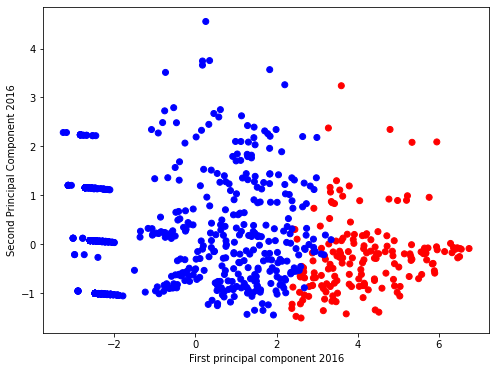

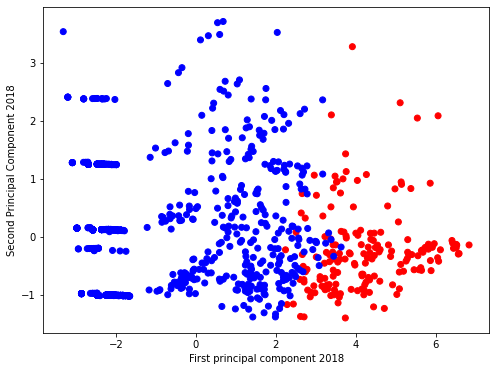

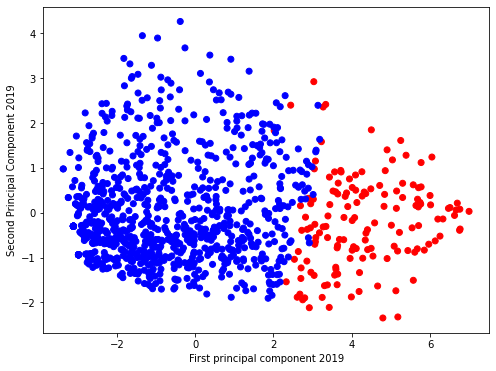

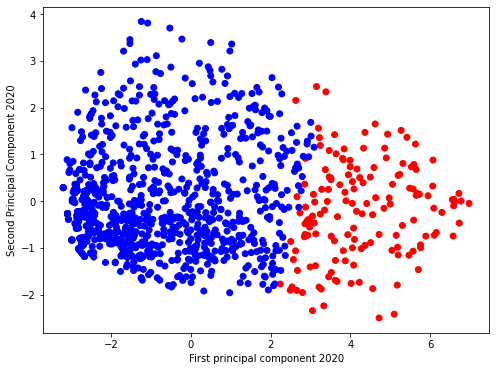

In [33]:
i=0
for x_pca in x_pcas:
    plt.figure(figsize=(8,6))
    plt.scatter(x_pca[:,0],x_pca[:,1],c=datas[i]["color"],cmap='rainbow')
    plt.xlabel('First principal component '+years[i])
    plt.ylabel('Second Principal Component '+years[i])
    i=i+1